In [1]:
import pandas as pd
import os
import numpy as np
import plotly.express as px

os.getcwd()

'c:\\Users\\user\\Projetos\\projecao_demanda_eletrica\\data'

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # remove warnings
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 15, 5

In [3]:
path = "temp_sul_01012000_30062022.csv"
df = pd.read_csv(path, parse_dates=["DATA_HORA"], 
                 usecols=["UF", "ESTACAO", "DATA_HORA", "PRECIPITAÇÃO_TOTAL_HORÁRIO", "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA",  
                          "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA", "TEMPERATURA_DO_PONTO_DE_ORVALHO", "UMIDADE_RELATIVA_DO_AR_HORARIA",
                          "VENTO_VELOCIDADE_HORARIA"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11245944 entries, 0 to 11245943
Data columns (total 9 columns):
 #   Column                                           Dtype         
---  ------                                           -----         
 0   PRECIPITAÇÃO_TOTAL_HORÁRIO                       float64       
 1   PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA  float64       
 2   TEMPERATURA_DO_AR__BULBO_SECO_HORARIA            float64       
 3   TEMPERATURA_DO_PONTO_DE_ORVALHO                  float64       
 4   UMIDADE_RELATIVA_DO_AR_HORARIA                   float64       
 5   VENTO_VELOCIDADE_HORARIA                         float64       
 6   ESTACAO                                          object        
 7   UF                                               object        
 8   DATA_HORA                                        datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 772.2+ MB


### Valores vazios

In [4]:
df.isna().sum()

PRECIPITAÇÃO_TOTAL_HORÁRIO                         581247
PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA    484877
TEMPERATURA_DO_AR__BULBO_SECO_HORARIA              479010
TEMPERATURA_DO_PONTO_DE_ORVALHO                    592060
UMIDADE_RELATIVA_DO_AR_HORARIA                     595403
VENTO_VELOCIDADE_HORARIA                           584961
ESTACAO                                                 0
UF                                                      0
DATA_HORA                                               0
dtype: int64

In [5]:
df.describe()

,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
count,1.066470e+07,1.076107e+07,1.076693e+07,1.065388e+07,1.065054e+07,1.066098e+07
mean,-7.185842e+02,4.010270e+02,-4.997081e+02,-6.127890e+02,-5.611531e+02,-6.405715e+02
std,2.582736e+03,2.412457e+03,2.219534e+03,2.425853e+03,2.453970e+03,2.453193e+03
min,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
25%,0.000000e+00,9.208000e+02,1.420000e+01,1.020000e+01,6.100000e+01,6.000000e-01
50%,0.000000e+00,9.600000e+02,1.860000e+01,1.430000e+01,7.900000e+01,2.000000e+00
75%,0.000000e+00,1.001700e+03,2.260000e+01,1.770000e+01,9.100000e+01,3.500000e+00
max,9.440000e+01,1.049900e+03,4.440000e+01,4.350000e+01,1.000000e+02,4.340000e+01


In [6]:
df.replace(-9999, np.nan, inplace=True) # replace weird values with na

In [7]:
df.describe()

,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
count,9.898084e+06,1.021176e+07,1.020956e+07,9.986811e+06,9.976118e+06,9.975507e+06
mean,1.900260e-01,9.604601e+02,1.888807e+01,1.416665e+01,7.688073e+01,2.501381e+00
std,1.258545e+00,4.391103e+01,5.979249e+00,5.169588e+00,1.790418e+01,2.108208e+00
min,0.000000e+00,8.026000e+02,-9.600000e+00,-4.250000e+01,7.000000e+00,0.000000e+00
25%,0.000000e+00,9.254000e+02,1.500000e+01,1.120000e+01,6.500000e+01,9.000000e-01
50%,0.000000e+00,9.632000e+02,1.900000e+01,1.480000e+01,8.100000e+01,2.200000e+00
75%,0.000000e+00,1.002900e+03,2.290000e+01,1.790000e+01,9.200000e+01,3.600000e+00
max,9.440000e+01,1.049900e+03,4.440000e+01,4.350000e+01,1.000000e+02,4.340000e+01


In [8]:
df.isna().sum()

PRECIPITAÇÃO_TOTAL_HORÁRIO                         1347860
PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA    1034183
TEMPERATURA_DO_AR__BULBO_SECO_HORARIA              1036382
TEMPERATURA_DO_PONTO_DE_ORVALHO                    1259133
UMIDADE_RELATIVA_DO_AR_HORARIA                     1269826
VENTO_VELOCIDADE_HORARIA                           1270437
ESTACAO                                                  0
UF                                                       0
DATA_HORA                                                0
dtype: int64

In [9]:
# group by datetime to investigate null values
df_na = pd.concat([df["DATA_HORA"], df.iloc[:, 0:-3]], axis = 1) 
df_na_2 = df_na.groupby("DATA_HORA").mean()
df_na_2.isna().sum()

PRECIPITAÇÃO_TOTAL_HORÁRIO                         1973
PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA    1941
TEMPERATURA_DO_AR__BULBO_SECO_HORARIA              1924
TEMPERATURA_DO_PONTO_DE_ORVALHO                    1925
UMIDADE_RELATIVA_DO_AR_HORARIA                     1924
VENTO_VELOCIDADE_HORARIA                           2047
dtype: int64

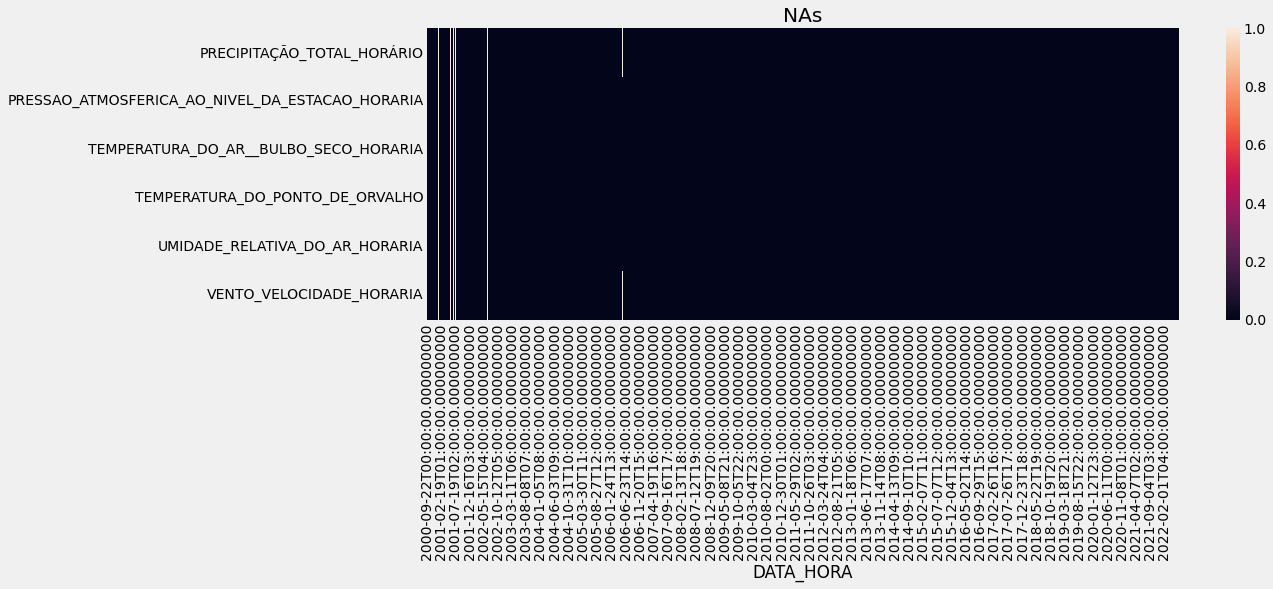

In [10]:
plt.figure()
sns.heatmap(df_na_2.isna().transpose())

plt.title("NAs")
plt.show()

Imputing data

In [11]:
df.columns

Index(['PRECIPITAÇÃO_TOTAL_HORÁRIO',
       'PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA',
       'TEMPERATURA_DO_AR__BULBO_SECO_HORARIA',
       'TEMPERATURA_DO_PONTO_DE_ORVALHO', 'UMIDADE_RELATIVA_DO_AR_HORARIA',
       'VENTO_VELOCIDADE_HORARIA', 'ESTACAO', 'UF', 'DATA_HORA'],
      dtype='object')

In [12]:
df["ESTACAO"].nunique() # number of weather stations

95

In [60]:
#  Grouping by state and datetime
df_2 = pd.concat([df[["UF","DATA_HORA"]], df.iloc[:, 0:-3]], axis = 1)
df_2["DATA"] = df_2.DATA_HORA.dt.date
df_2 = df_2.groupby(["UF", "DATA"], as_index=False).agg({
                                                            "PRECIPITAÇÃO_TOTAL_HORÁRIO": "sum",
                                                            "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA": "mean",
                                                            "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA": "mean",
                                                            "TEMPERATURA_DO_PONTO_DE_ORVALHO": "mean",
                                                            "UMIDADE_RELATIVA_DO_AR_HORARIA": "mean",
                                                            "VENTO_VELOCIDADE_HORARIA": "mean"
                                                            })
df_2.head()

,UF,DATA,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
0,PR,2003-01-28,0.0,NaN,NaN,NaN,NaN,NaN
1,PR,2003-01-29,0.0,NaN,NaN,NaN,NaN,NaN
2,PR,2003-01-30,0.0,NaN,NaN,NaN,NaN,NaN
3,PR,2003-01-31,0.0,NaN,NaN,NaN,NaN,NaN
4,PR,2003-02-01,0.0,NaN,NaN,NaN,NaN,NaN


In [61]:
# Rename columns to pivot each one by state
col_rel = {
        "PRECIPITAÇÃO_TOTAL_HORÁRIO": "PRECIPITACAO",
        "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA": "PRESSAO_ATM",
        "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA": "TEMP_AR_BULBO_SECO",
        "TEMPERATURA_DO_PONTO_DE_ORVALHO": "TEMP_ORVALHO",
        "UMIDADE_RELATIVA_DO_AR_HORARIA": "UMIDADE_RELATIVA_AR",
        "VENTO_VELOCIDADE_HORARIA": "VELOCIDADE_VENTO"
}
df_2.rename(col_rel, axis = 1, inplace = True)

In [62]:
df_2.tail()

,UF,DATA,PRECIPITACAO,PRESSAO_ATM,TEMP_AR_BULBO_SECO,TEMP_ORVALHO,UMIDADE_RELATIVA_AR,VELOCIDADE_VENTO
22141,SC,2022-06-26,0.0,954.529204,12.527729,10.990354,87.463023,2.162832
22142,SC,2022-06-27,1.2,952.394611,13.890419,12.251014,86.935811,1.915663
22143,SC,2022-06-28,0.6,948.462952,15.181928,12.397611,81.836177,2.724695
22144,SC,2022-06-29,52.4,946.143582,12.540896,9.474919,80.452769,3.338806
22145,SC,2022-06-30,1.2,949.513174,10.449401,5.942157,76.816993,1.615663


In [63]:
ufs = df_2.UF.unique()
df_pivoted = pd.DataFrame()
for uf in ufs:
    df_subset = df_2[df_2.UF == uf]
    df_subset.drop("UF", axis = 1, inplace = True)
    new_cols = []
    for col in df_subset.columns:
        if col == "DATA":
            new_col_name  = col
        else:
            new_col_name = f"{col}_{uf}"
        new_cols.append(new_col_name)
    df_subset.columns = new_cols
    if df_pivoted.empty:
        df_pivoted = df_subset
    else:
        df_pivoted = pd.merge(df_pivoted, df_subset, on = "DATA", how = "outer")
df_pivoted.sort_values(by = "DATA", inplace = True)
df_pivoted.tail()

,DATA,PRECIPITACAO_PR,PRESSAO_ATM_PR,TEMP_AR_BULBO_SECO_PR,TEMP_ORVALHO_PR,UMIDADE_RELATIVA_AR_PR,VELOCIDADE_VENTO_PR,PRECIPITACAO_RS,PRESSAO_ATM_RS,TEMP_AR_BULBO_SECO_RS,TEMP_ORVALHO_RS,UMIDADE_RELATIVA_AR_RS,VELOCIDADE_VENTO_RS,PRECIPITACAO_SC,PRESSAO_ATM_SC,TEMP_AR_BULBO_SECO_SC,TEMP_ORVALHO_SC,UMIDADE_RELATIVA_AR_SC,VELOCIDADE_VENTO_SC
7089,2022-06-26,0.0,942.865015,16.313932,13.692466,83.462329,1.794737,2.4,979.883820,9.384211,7.342044,87.332471,2.456218,0.0,954.529204,12.527729,10.990354,87.463023,2.162832
7090,2022-06-27,0.2,942.038206,15.660465,12.021455,79.221818,2.088040,4.8,975.075118,13.244390,11.627785,89.895006,1.871934,1.2,952.394611,13.890419,12.251014,86.935811,1.915663
7091,2022-06-28,0.2,940.289189,16.617230,12.362593,77.600000,1.814865,258.6,970.942908,14.812515,13.151621,89.861842,2.395478,0.6,948.462952,15.181928,12.397611,81.836177,2.724695
7092,2022-06-29,0.2,939.770508,16.030169,10.994424,73.858736,2.197627,146.4,972.270429,10.450569,7.629843,83.900662,2.602767,52.4,946.143582,12.540896,9.474919,80.452769,3.338806
7093,2022-06-30,0.8,941.674324,13.786149,8.104286,72.796429,1.069932,5.8,975.509954,10.004167,6.557231,81.126708,1.481258,1.2,949.513174,10.449401,5.942157,76.816993,1.615663


In [64]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7952 entries, 7094 to 7093
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATA                    7952 non-null   object 
 1   PRECIPITACAO_PR         7094 non-null   float64
 2   PRESSAO_ATM_PR          6221 non-null   float64
 3   TEMP_AR_BULBO_SECO_PR   6221 non-null   float64
 4   TEMP_ORVALHO_PR         6221 non-null   float64
 5   UMIDADE_RELATIVA_AR_PR  6221 non-null   float64
 6   VELOCIDADE_VENTO_PR     6040 non-null   float64
 7   PRECIPITACAO_RS         7952 non-null   float64
 8   PRESSAO_ATM_RS          7919 non-null   float64
 9   TEMP_AR_BULBO_SECO_RS   7919 non-null   float64
 10  TEMP_ORVALHO_RS         7919 non-null   float64
 11  UMIDADE_RELATIVA_AR_RS  7919 non-null   float64
 12  VELOCIDADE_VENTO_RS     7913 non-null   float64
 13  PRECIPITACAO_SC         7100 non-null   float64
 14  PRESSAO_ATM_SC          6716 non-null

In [65]:
df_pivoted.isna().sum()

DATA                         0
PRECIPITACAO_PR            858
PRESSAO_ATM_PR            1731
TEMP_AR_BULBO_SECO_PR     1731
TEMP_ORVALHO_PR           1731
UMIDADE_RELATIVA_AR_PR    1731
VELOCIDADE_VENTO_PR       1912
PRECIPITACAO_RS              0
PRESSAO_ATM_RS              33
TEMP_AR_BULBO_SECO_RS       33
TEMP_ORVALHO_RS             33
UMIDADE_RELATIVA_AR_RS      33
VELOCIDADE_VENTO_RS         39
PRECIPITACAO_SC            852
PRESSAO_ATM_SC            1236
TEMP_AR_BULBO_SECO_SC     1235
TEMP_ORVALHO_SC           1235
UMIDADE_RELATIVA_AR_SC    1235
VELOCIDADE_VENTO_SC       1238
dtype: int64

In [66]:
df_pivoted_2 = df_pivoted.copy(deep=True)
for col in df_pivoted.columns:
    if df_pivoted_2[col].dtype == 'float64':
        df_pivoted_2[col].interpolate(method="linear", inplace = True)
    else:
        continue
df_pivoted_2.head()

,DATA,PRECIPITACAO_PR,PRESSAO_ATM_PR,TEMP_AR_BULBO_SECO_PR,TEMP_ORVALHO_PR,UMIDADE_RELATIVA_AR_PR,VELOCIDADE_VENTO_PR,PRECIPITACAO_RS,PRESSAO_ATM_RS,TEMP_AR_BULBO_SECO_RS,TEMP_ORVALHO_RS,UMIDADE_RELATIVA_AR_RS,VELOCIDADE_VENTO_RS,PRECIPITACAO_SC,PRESSAO_ATM_SC,TEMP_AR_BULBO_SECO_SC,TEMP_ORVALHO_SC,UMIDADE_RELATIVA_AR_SC,VELOCIDADE_VENTO_SC
7094,2000-09-22,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1014.950000,17.120000,10.740000,69.150000,1.830000,NaN,NaN,NaN,NaN,NaN,NaN
7095,2000-09-23,NaN,NaN,NaN,NaN,NaN,NaN,28.0,1006.987500,17.604167,12.916667,76.125000,1.558333,NaN,NaN,NaN,NaN,NaN,NaN
7096,2000-09-24,NaN,NaN,NaN,NaN,NaN,NaN,23.8,1008.200000,14.995833,11.504167,80.750000,2.454167,NaN,NaN,NaN,NaN,NaN,NaN
7097,2000-09-25,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1020.054167,10.704167,3.283333,61.458333,2.733333,NaN,NaN,NaN,NaN,NaN,NaN
7098,2000-09-26,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1024.416667,11.833333,4.704167,63.458333,1.750000,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_pivoted.isna().sum()

DATA                         0
PRECIPITACAO_PR            858
PRESSAO_ATM_PR            1731
TEMP_AR_BULBO_SECO_PR     1731
TEMP_ORVALHO_PR           1731
UMIDADE_RELATIVA_AR_PR    1731
VELOCIDADE_VENTO_PR       1912
PRECIPITACAO_RS              0
PRESSAO_ATM_RS              33
TEMP_AR_BULBO_SECO_RS       33
TEMP_ORVALHO_RS             33
UMIDADE_RELATIVA_AR_RS      33
VELOCIDADE_VENTO_RS         39
PRECIPITACAO_SC            852
PRESSAO_ATM_SC            1236
TEMP_AR_BULBO_SECO_SC     1235
TEMP_ORVALHO_SC           1235
UMIDADE_RELATIVA_AR_SC    1235
VELOCIDADE_VENTO_SC       1238
dtype: int64

In [68]:
for col in df_pivoted_2.columns:
    if df_pivoted_2[col].dtype == 'float64':
        col_mean = df_pivoted_2[col].mean()
        df_pivoted_2[col].fillna(col_mean, inplace = True)
    else:
        continue
df_pivoted_2.head()

,DATA,PRECIPITACAO_PR,PRESSAO_ATM_PR,TEMP_AR_BULBO_SECO_PR,TEMP_ORVALHO_PR,UMIDADE_RELATIVA_AR_PR,VELOCIDADE_VENTO_PR,PRECIPITACAO_RS,PRESSAO_ATM_RS,TEMP_AR_BULBO_SECO_RS,TEMP_ORVALHO_RS,UMIDADE_RELATIVA_AR_RS,VELOCIDADE_VENTO_RS,PRECIPITACAO_SC,PRESSAO_ATM_SC,TEMP_AR_BULBO_SECO_SC,TEMP_ORVALHO_SC,UMIDADE_RELATIVA_AR_SC,VELOCIDADE_VENTO_SC
7094,2000-09-22,65.034452,938.323849,20.026674,14.779818,74.791448,2.068908,0.0,1014.950000,17.120000,10.740000,69.150000,1.830000,70.595577,961.025168,18.598034,14.422481,79.058452,2.342634
7095,2000-09-23,65.034452,938.323849,20.026674,14.779818,74.791448,2.068908,28.0,1006.987500,17.604167,12.916667,76.125000,1.558333,70.595577,961.025168,18.598034,14.422481,79.058452,2.342634
7096,2000-09-24,65.034452,938.323849,20.026674,14.779818,74.791448,2.068908,23.8,1008.200000,14.995833,11.504167,80.750000,2.454167,70.595577,961.025168,18.598034,14.422481,79.058452,2.342634
7097,2000-09-25,65.034452,938.323849,20.026674,14.779818,74.791448,2.068908,0.0,1020.054167,10.704167,3.283333,61.458333,2.733333,70.595577,961.025168,18.598034,14.422481,79.058452,2.342634
7098,2000-09-26,65.034452,938.323849,20.026674,14.779818,74.791448,2.068908,0.0,1024.416667,11.833333,4.704167,63.458333,1.750000,70.595577,961.025168,18.598034,14.422481,79.058452,2.342634


In [69]:
df_pivoted_2.isna().sum()

DATA                      0
PRECIPITACAO_PR           0
PRESSAO_ATM_PR            0
TEMP_AR_BULBO_SECO_PR     0
TEMP_ORVALHO_PR           0
UMIDADE_RELATIVA_AR_PR    0
VELOCIDADE_VENTO_PR       0
PRECIPITACAO_RS           0
PRESSAO_ATM_RS            0
TEMP_AR_BULBO_SECO_RS     0
TEMP_ORVALHO_RS           0
UMIDADE_RELATIVA_AR_RS    0
VELOCIDADE_VENTO_RS       0
PRECIPITACAO_SC           0
PRESSAO_ATM_SC            0
TEMP_AR_BULBO_SECO_SC     0
TEMP_ORVALHO_SC           0
UMIDADE_RELATIVA_AR_SC    0
VELOCIDADE_VENTO_SC       0
dtype: int64

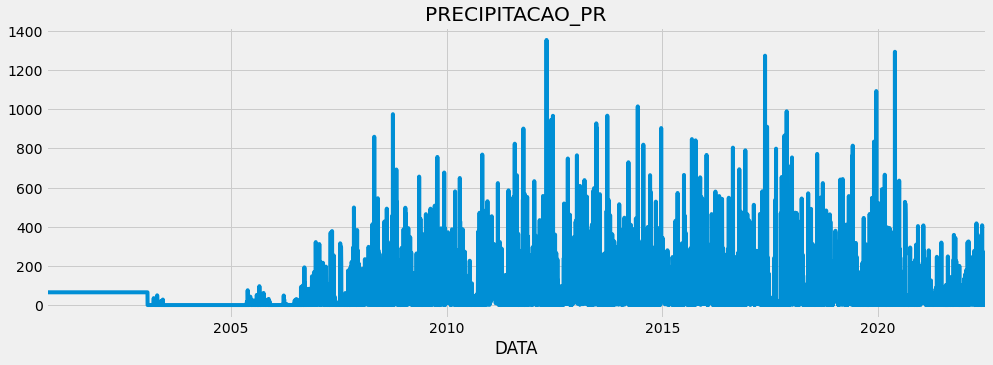

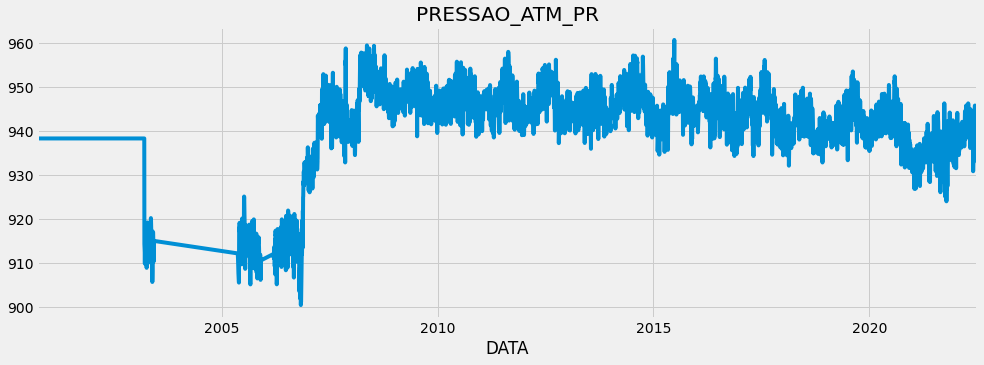

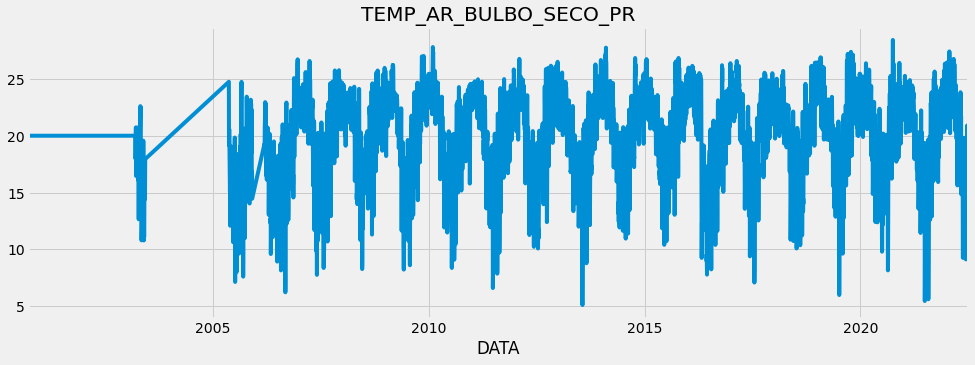

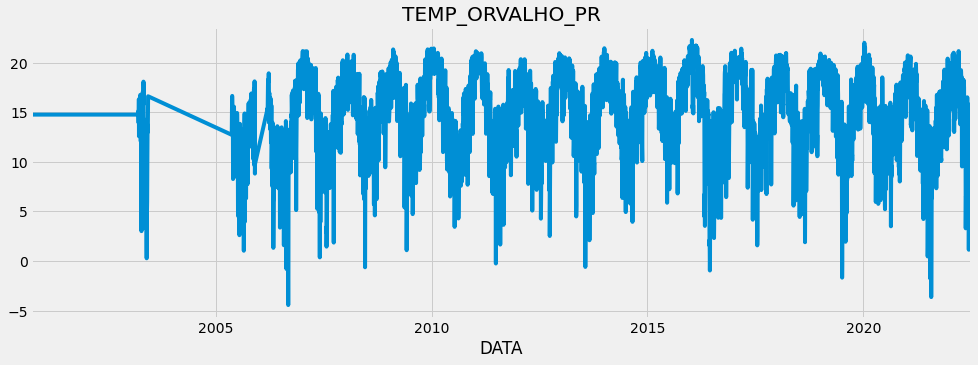

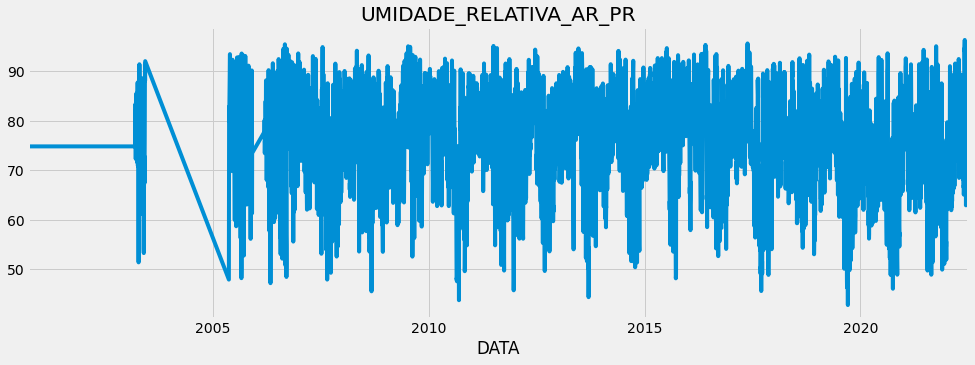

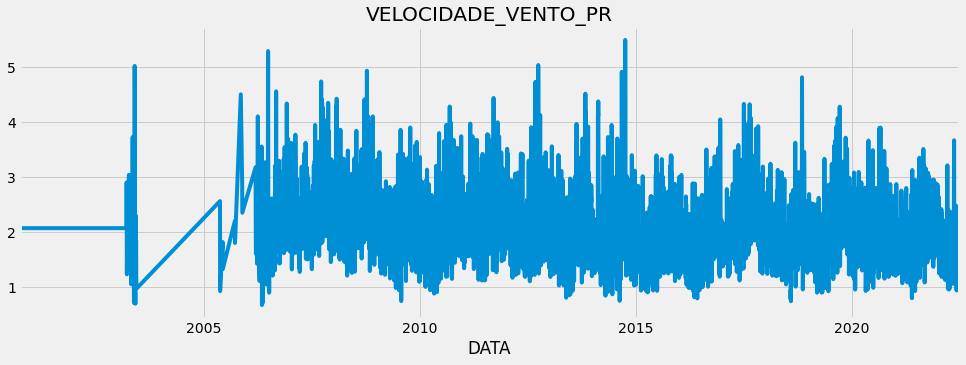

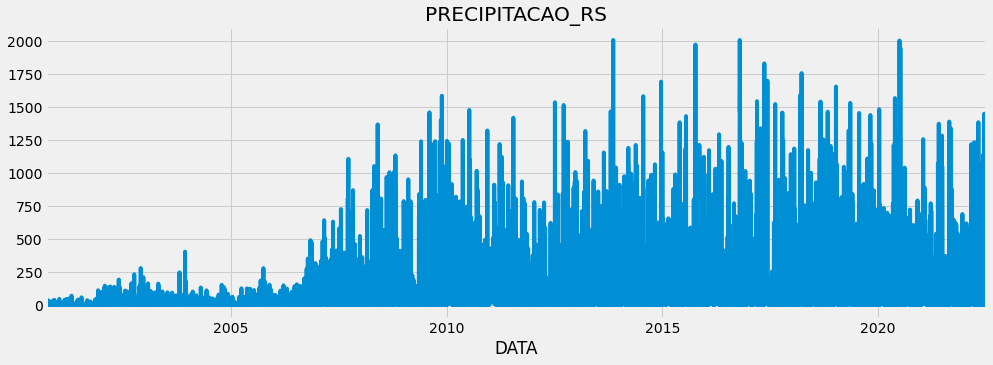

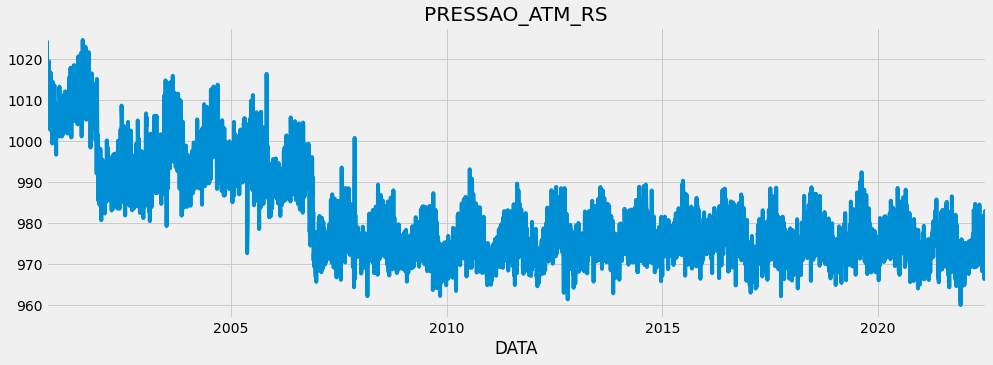

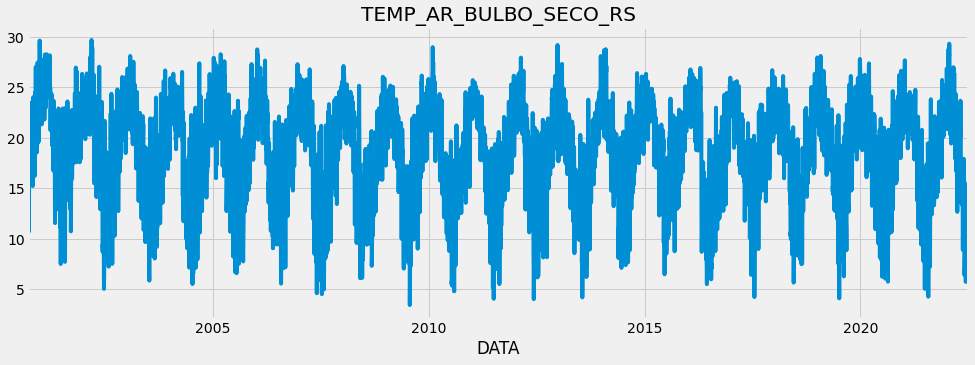

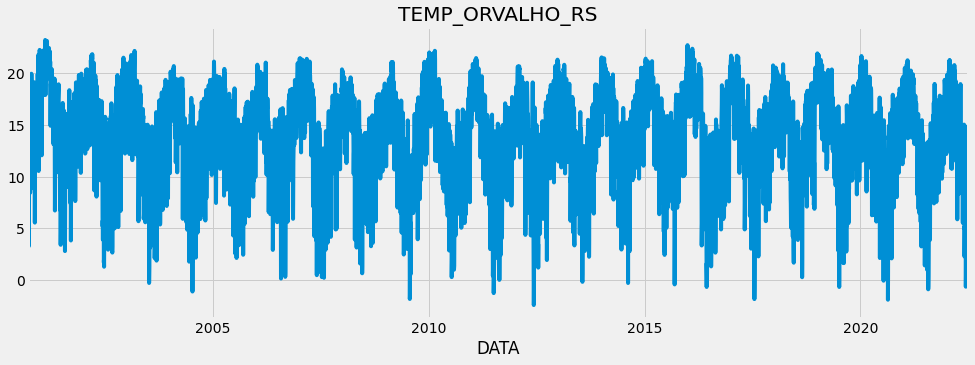

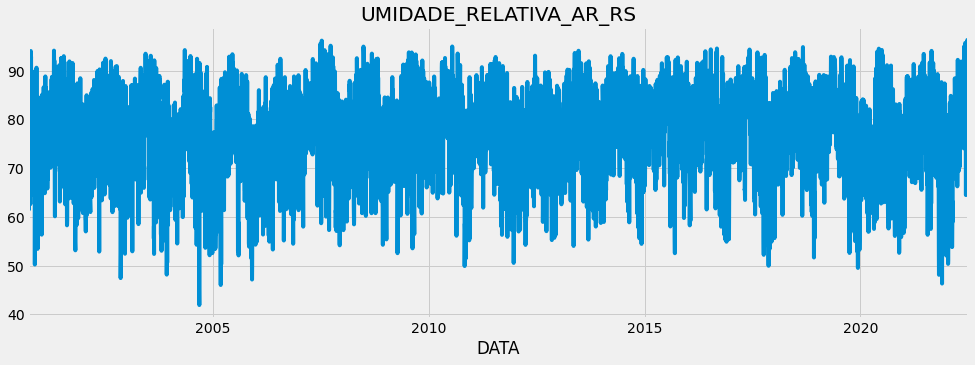

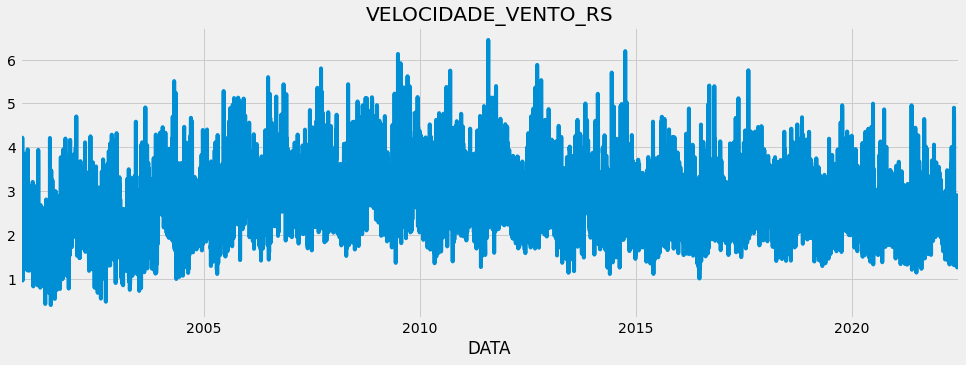

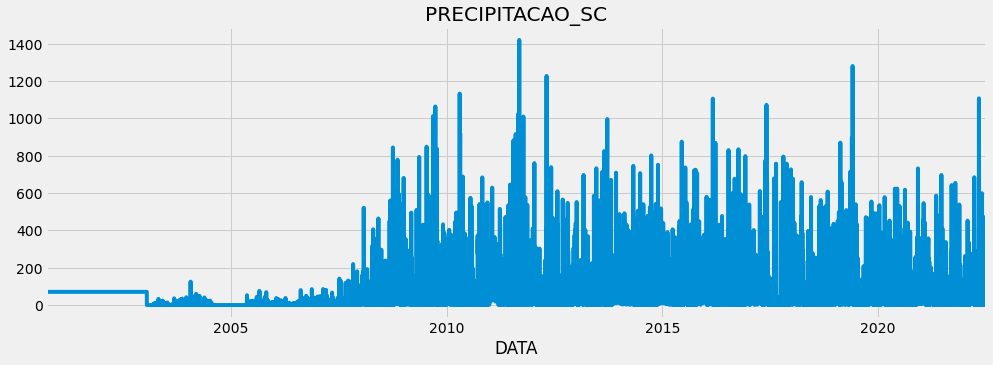

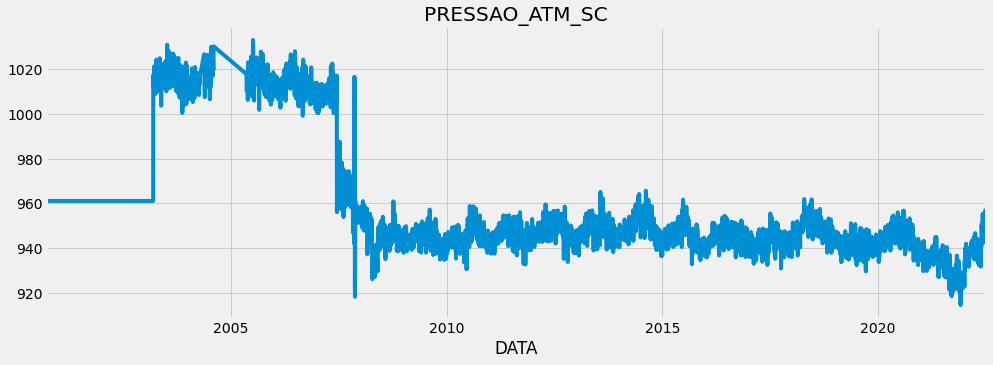

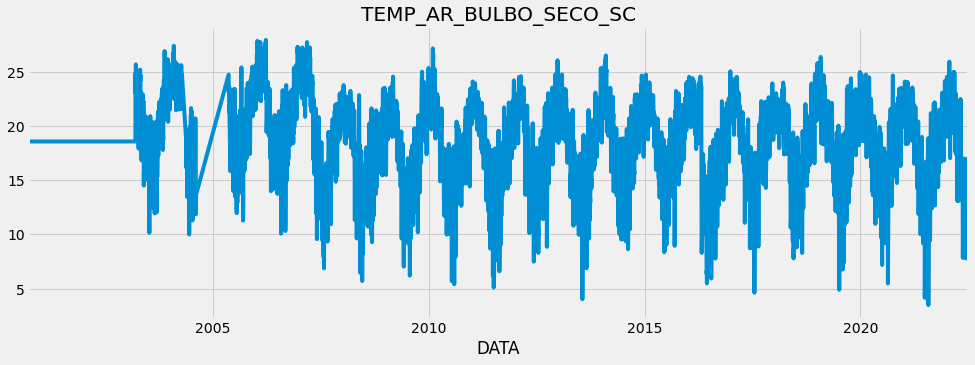

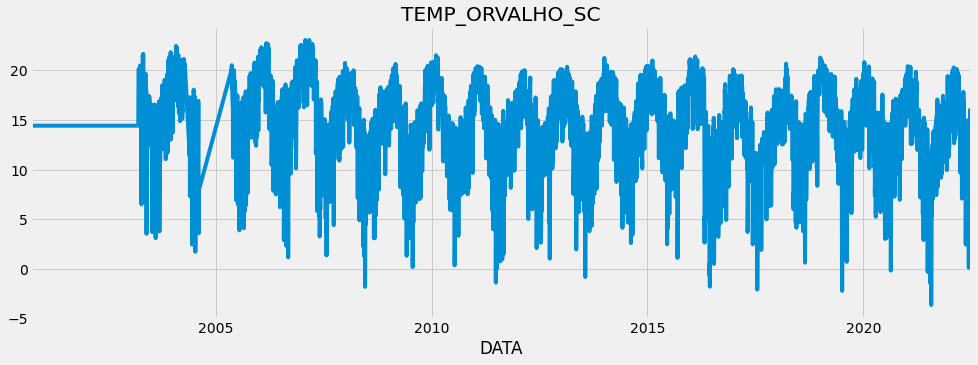

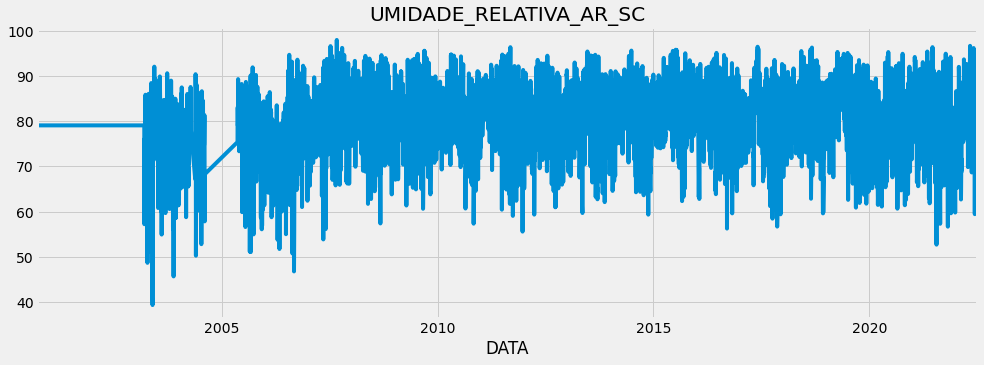

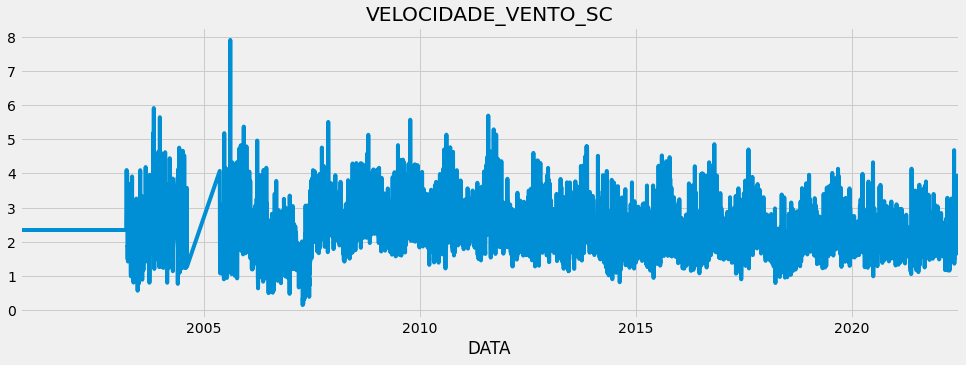

In [70]:
df_pivoted_2.loc[:, "DATA"] = pd.to_datetime(df_pivoted_2.loc[:, "DATA"])
df_pivoted_3 = df_pivoted_2.set_index("DATA")
for col in df_pivoted_3.columns:
    plt.figure()
    df_pivoted_3[col].plot()
    plt.title(col)
    plt.show()

In [43]:
px.scatter(df_pivoted_3["TEMP_ORVALHO_PR"])

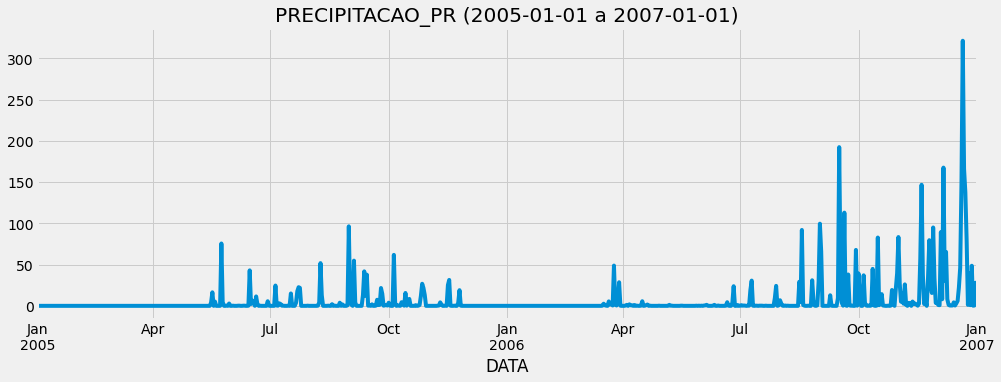

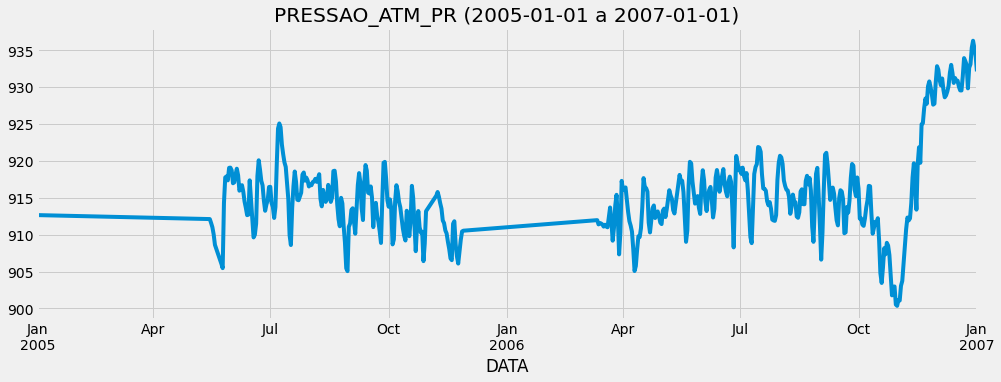

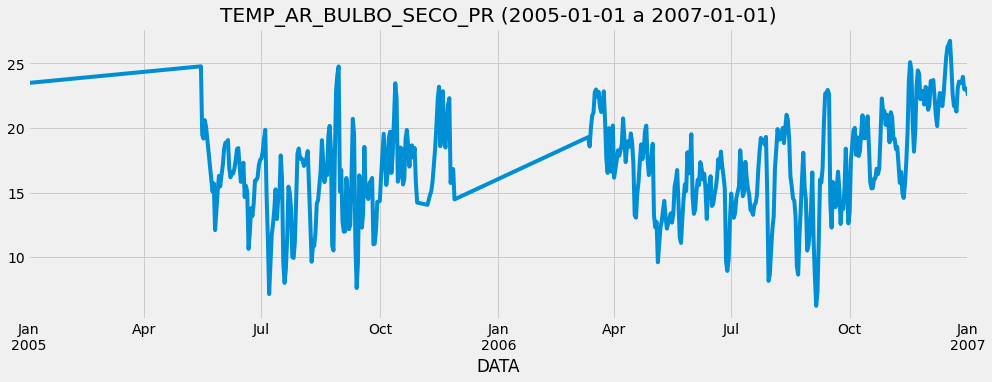

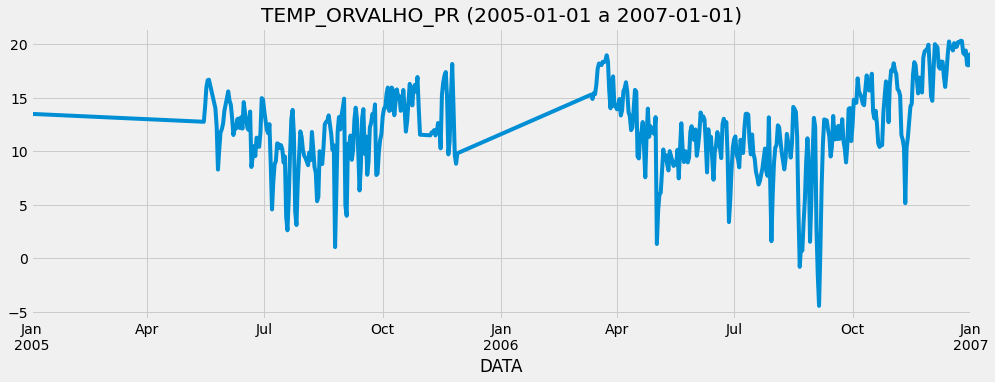

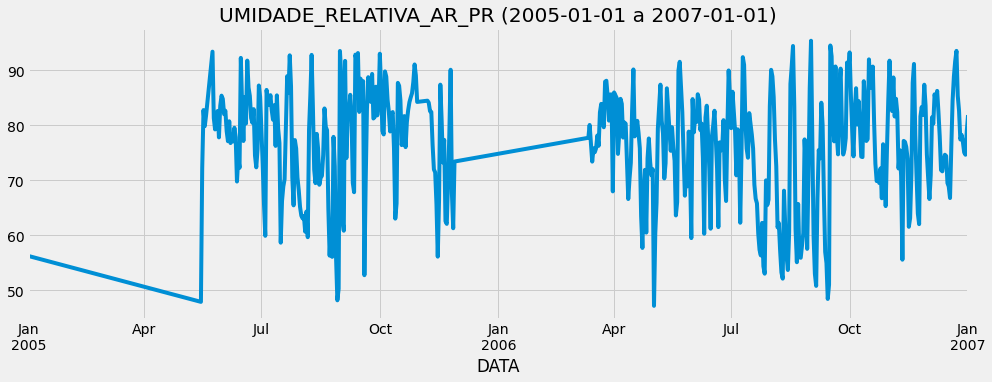

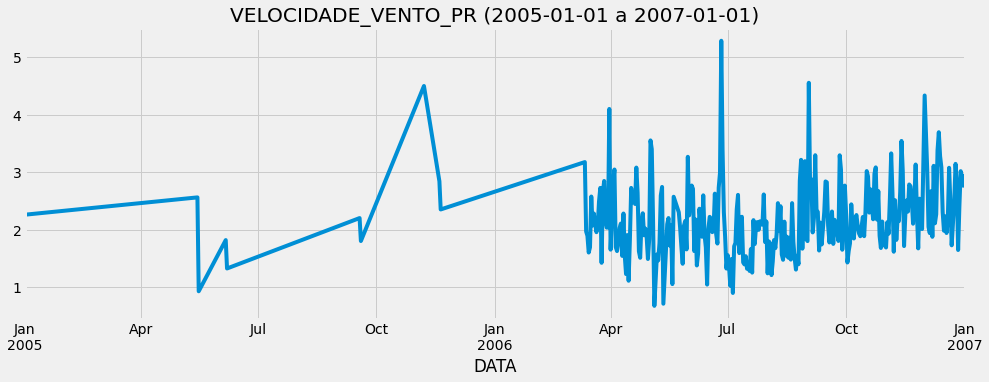

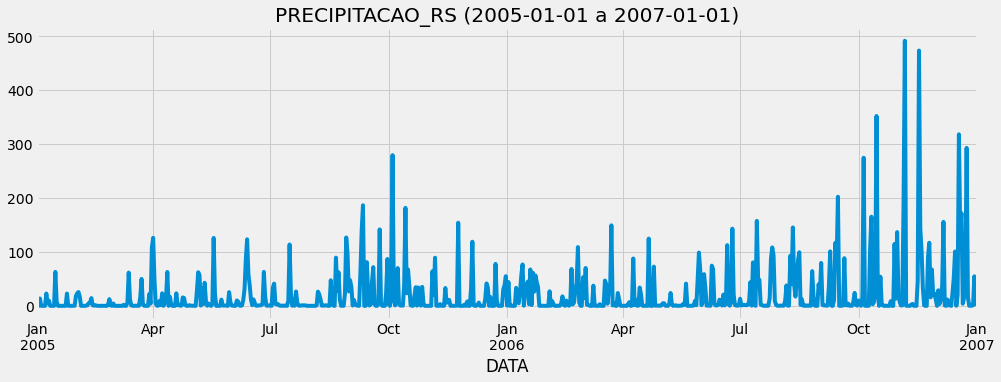

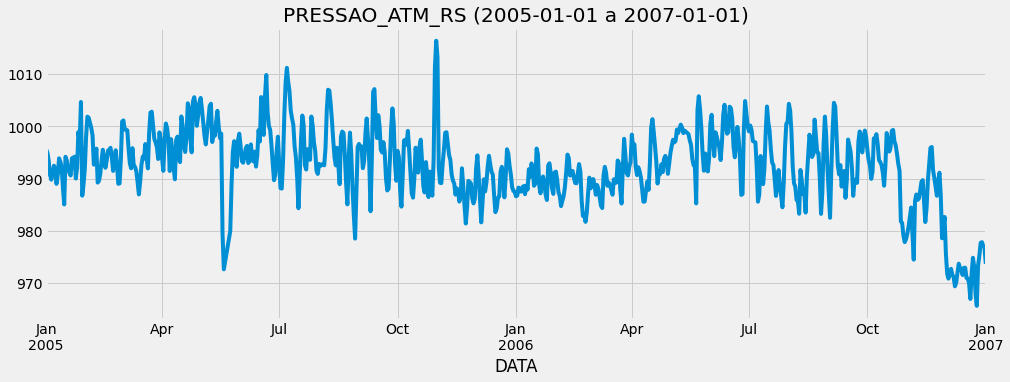

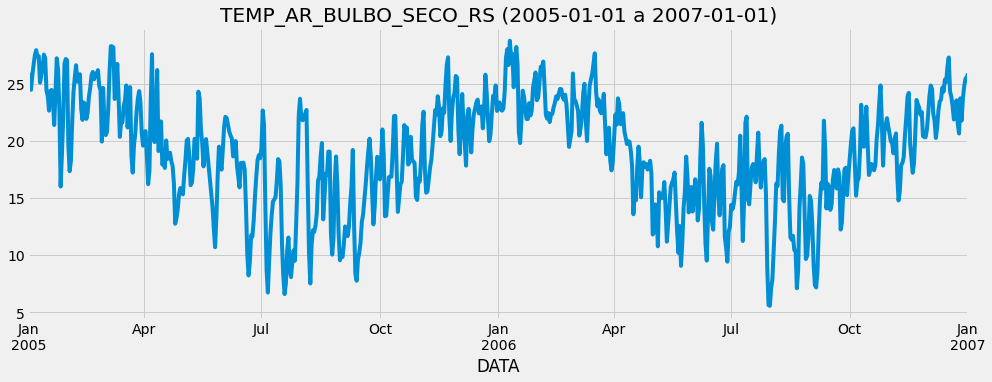

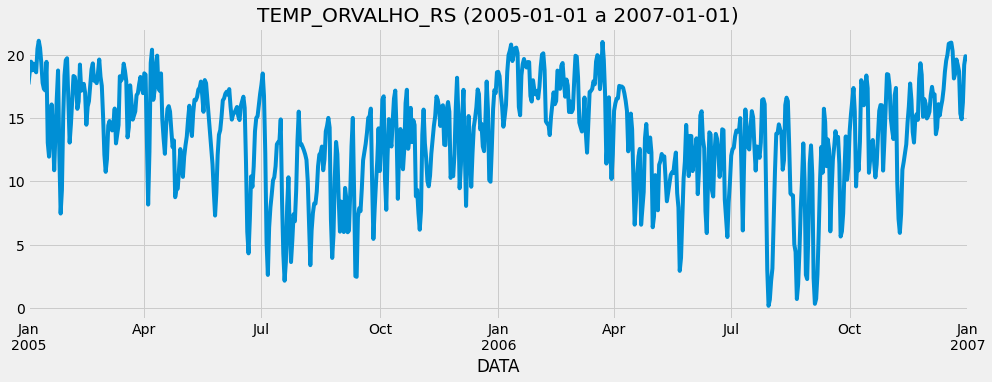

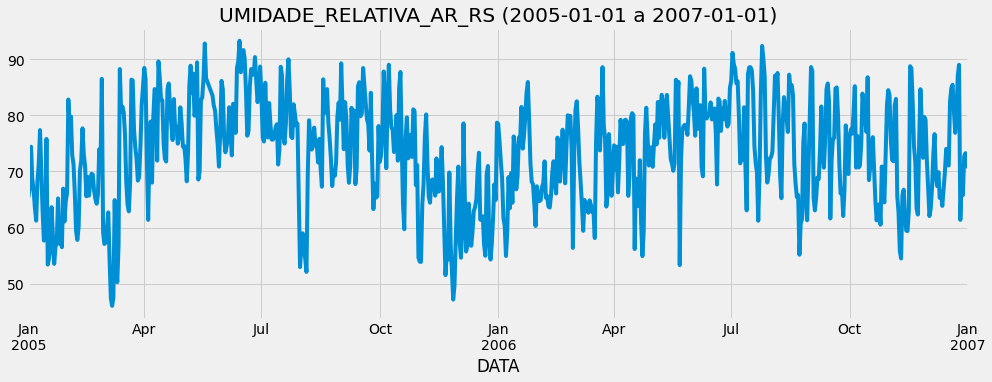

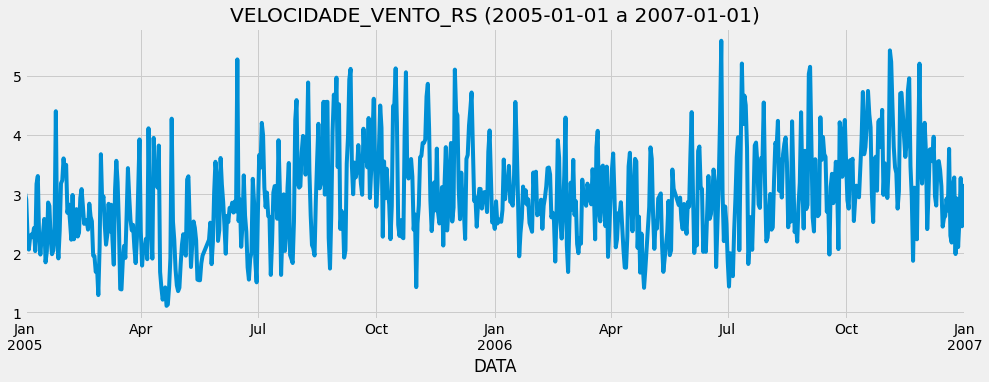

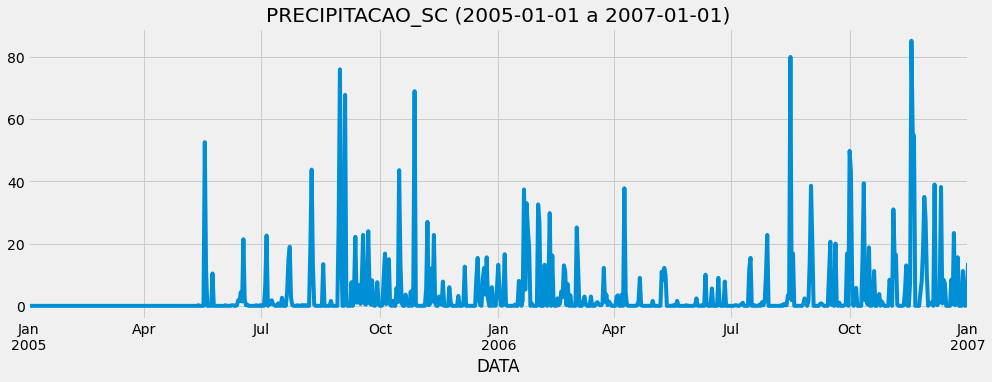

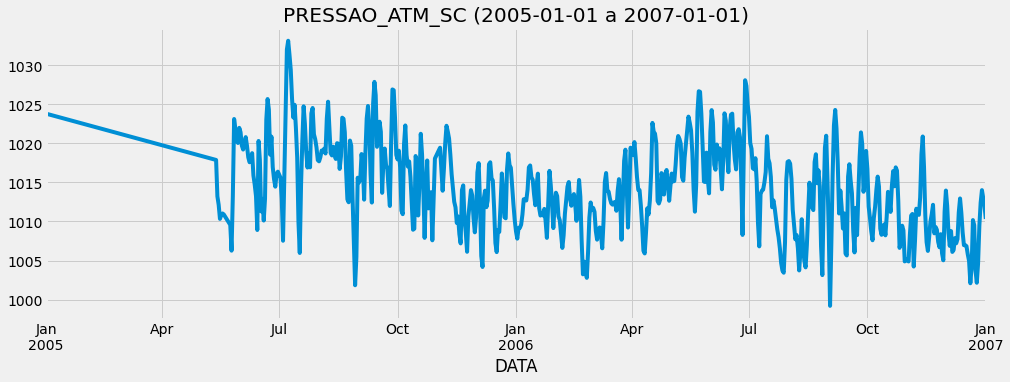

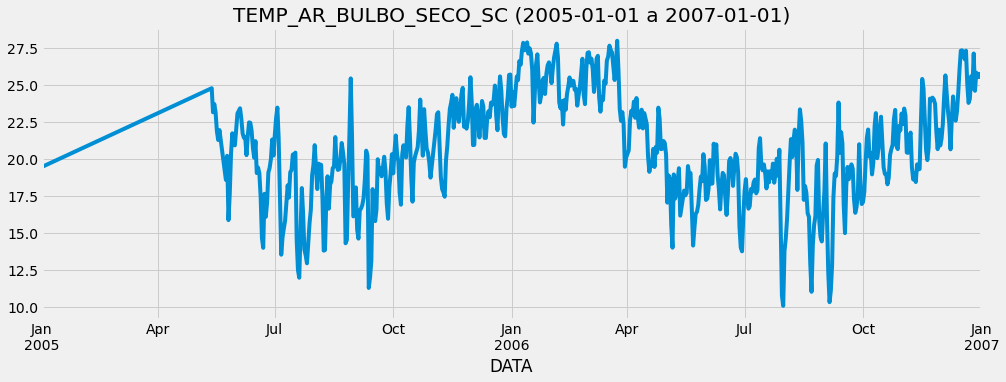

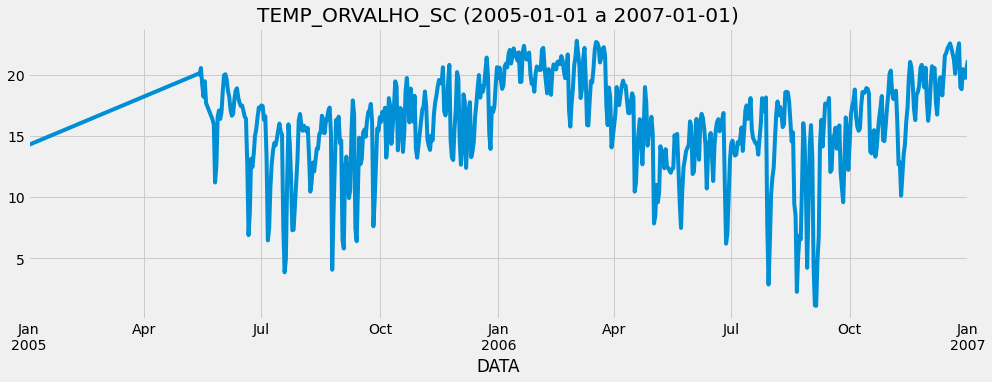

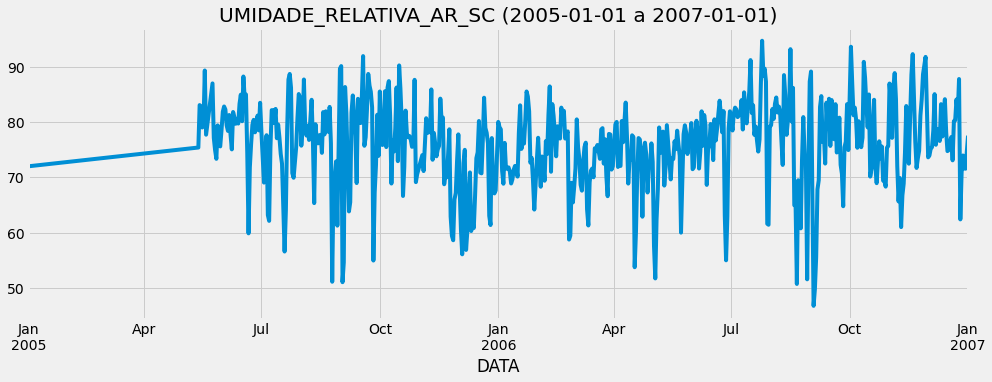

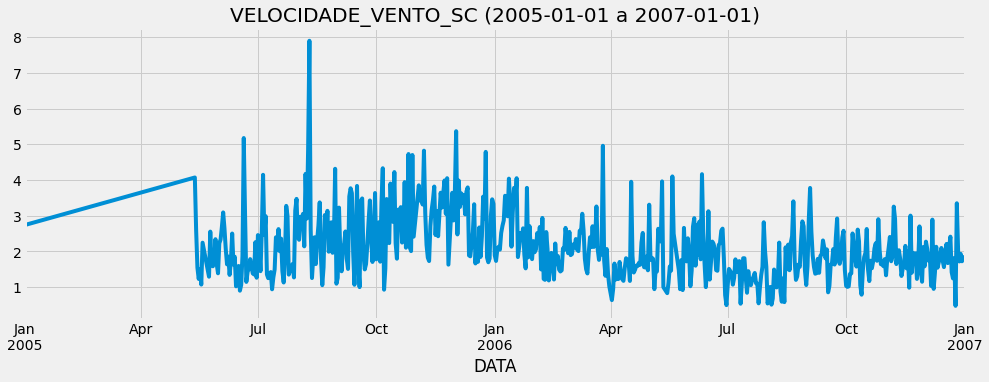

In [71]:
# AVALIANDO CORTE DE DATA INICIAL
#df_pivoted_3 = df_pivoted_2.set_index("DATA")
for col in df_pivoted_3.columns:
    data_init = "2005-01-01"
    data_fim = "2007-01-01"
    plt.figure()
    df_pivoted_3[col][data_init: data_fim].plot()
    plt.title(f"{col} ({data_init} a {data_fim})")
    plt.show()

In [73]:
data_corte = "2006-04-01"
df_pivoted_3[data_corte:].to_csv("weather_daily_data.csv")